In [1]:
import seaborn as sns
import pandas as pd 

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.ticker as ticker

import numpy as np
import glob

In [2]:
sns.set_style("whitegrid")
matplotlib.rcParams.update({'font.size': 20})

In [3]:
d = []

for pth in glob.glob('./results/modular/*'):
    df = pd.read_csv(pth)
    latent_states = set(df['latent_state'])
    if 5 not in latent_states and 2 not in latent_states:
        d.append(pth)

print(len(d))
print(d)

2
['./results/modular/6_lr0.001_adamw_seed35_scaling1.0.csv', './results/modular/6_lr0.001_adamw_seed18_scaling1.0.csv']


In [3]:
color_map = plt.cm.get_cmap('Set2')
hex_values = [color_map(i)[:3] for i in range(color_map.N)]
hex_colors = [mcolors.rgb2hex(color) for color in hex_values]
print(hex_colors)

['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494', '#b3b3b3']


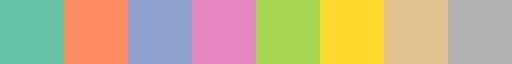

In [4]:
color_map

In [17]:
def plot_phases(df, alpha, s, n_states):
    plt.figure(figsize=(10, 5))

    # sns.scatterplot(data=df, x='step', y='train_loss', hue='latent_state', palette="pastel", s=40, alpha=1)
    # code below replication of the above function, with more control
    for i in range(n_states):
        mask = df['latent_state'] == i
        plt.scatter(df[mask]['step'], df[mask]['train_loss'], color=color_map(i), s=s, alpha=1)
    sns.lineplot(data=df, x='step', y='train_loss', linewidth=2, color='black', alpha=alpha, linestyle='--', label='Train')
    # plt.plot(df['step'], df['train_loss'], linewidth=2, color='black', alpha=alpha, linestyle='--', dashes=(10, 10), label='Train')

    # test
    for i in range(n_states):
        mask = df['latent_state'] == i
        plt.scatter(df[mask]['step'], df[mask]['eval_loss'], color=color_map(i), s=s)
    sns.lineplot(data=df, x='step', y='eval_loss', linewidth=2, color='black', alpha=alpha, label='Validation')

    plt.xlabel('Step')
    plt.ylabel('Loss')
    
# step --> epoch
def plot_phases_multiberts(df, alpha, s, n_states):
    fig, ax1 = plt.subplots(figsize=(8, 5))

    for i in range(n_states):
        mask = df['latent_state'] == i
        ax1.scatter(df[mask]['epoch'], df[mask]['train_loss'], color=color_map(i), s=s, alpha=1)
        
    sns.lineplot(ax=ax1, data=df, x='epoch', y='train_loss', linewidth=2, color='black', alpha=alpha, linestyle=':', label='Pretraining loss')
    
    ax2 = ax1.twinx()
    
    for i in range(n_states):
        mask = df['latent_state'] == i
        ax2.scatter(df[mask]['epoch'], df[mask]['mean_w'], color=color_map(i), s=s, alpha=1)

    sns.lineplot(ax=ax2, data=df, x='epoch', y='mean_w', linewidth=2, color='black', alpha=alpha, linestyle='-', label='Average weight')

    handles1, labels1 = ax1.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()

    # Combine the handles and labels
    handles = handles1 + handles2
    labels = labels1 + labels2
    
    ax1.set_xlabel('Step')
    ax1.set_ylabel('Loss')
    ax2.set_ylabel('Average weight')
    # Create a shared legend for both y-axes
    ax1.legend().remove()
    ax2.legend().remove()
    
    ax2.ticklabel_format(axis='y', style='sci', scilimits=(-5,-5))
    # ax2.yaxis.get_offset_text().set_text('e-4')
    
#     formatter = ticker.ScalarFormatter(useMathText=True)
#     formatter.set_powerlimits((0, 0))
#     formatter.set_scientific(True)
#     # formatter.set_precision(5)
#     ax2.yaxis.set_major_formatter(formatter)
    # ax2.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
    # plt.ticklabel_format(style='plain', axis='y', useOffset=False)
    ax1.legend(handles, labels)
    
    return fig, (ax1, ax2)

    

# conceptual figure

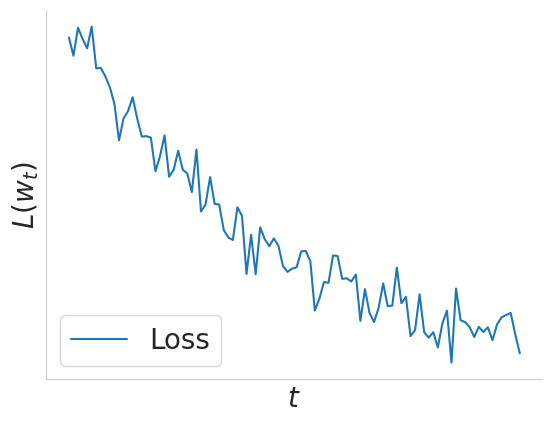

In [10]:
def exponential_function(x, a, b):
    return a * np.exp(-b * x)

# Generate x values
x = np.linspace(0, 5, 100)

# Set the parameters for the exponential decay function
a = 2  # Initial value
b = 0.5  # Decay rate

# Calculate y values using the exponential decay function
y = exponential_function(x, a, b)
noise = np.random.normal(0, 0.1, len(x))
y_with_noise = y + noise


# Plot the exponential decay function
plt.plot(x, y_with_noise, label='Loss', linewidth=2, color='black', alpha=0.5)
plt.xlabel('$t$')
plt.ylabel('$L(w_t)$')
# plt.title('Exponential Decay Function: y = {} * exp(-{} * x)'.format(a, b))
plt.legend(loc='lower left')
# plt.grid(True)
plt.xticks([])
plt.yticks([])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("./figures/conceptual_before")

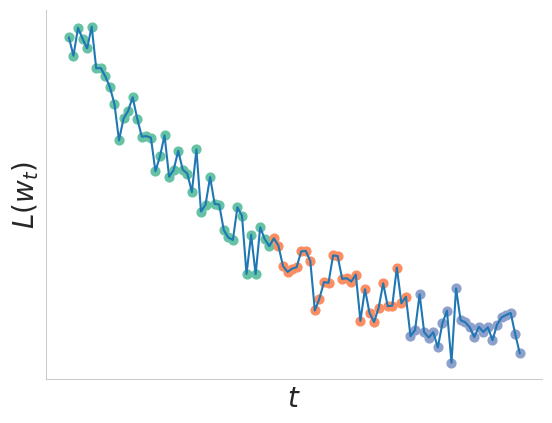

In [21]:
colors = [0]*45 + [1]*30 + [2]* 25
colors = np.array(colors)


for i in range(3):
    mask = colors == i
    plt.scatter(x[mask], y_with_noise[mask], color=color_map(i), s=40, alpha=1)
plt.plot(x, y_with_noise)
    
plt.xticks([])
plt.yticks([])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('$t$')
plt.ylabel('$L(w_t)$')
plt.savefig("./figures/conceptual_after")

In [17]:
colors

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# sparse parities

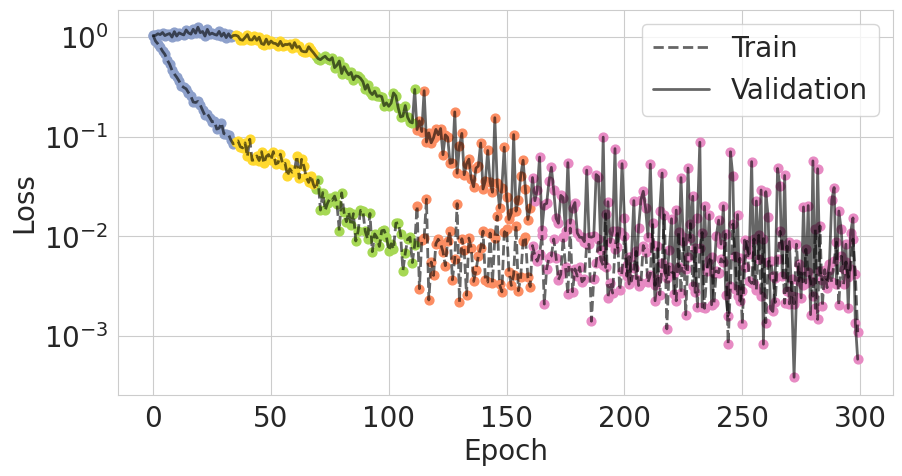

In [13]:
seed=11
df = pd.read_csv(f'./results/parities/6_lr0.1_sgd_seed{seed}_scaling1.0.csv')

plot_phases(df, alpha=0.6, s=40, n_states=6)
plt.xlabel("Epoch")
plt.savefig(f'figures/parities/{seed}', dpi=300, bbox_inches='tight')
plt.yscale('log')

# mnist

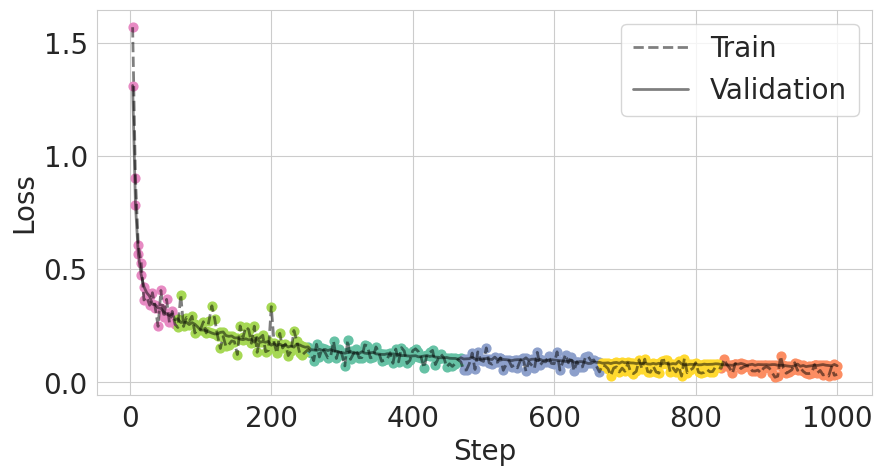

In [11]:
seed=5
df = pd.read_csv(f'./results/mnist_v2/6_lr0.001_adamw_seed{seed}_scaling1.0.csv')
df['latent_state'] = pd.read_csv(f'./results/mnist_250/6_lr0.001_adamw_seed{seed}_scaling1.0.csv')['latent_state']
plot_phases(df, 0.5, 40, n_states=6)
plt.savefig(f'figures/mnist/{seed}', dpi=300, bbox_inches='tight')

# MNIST LeNet

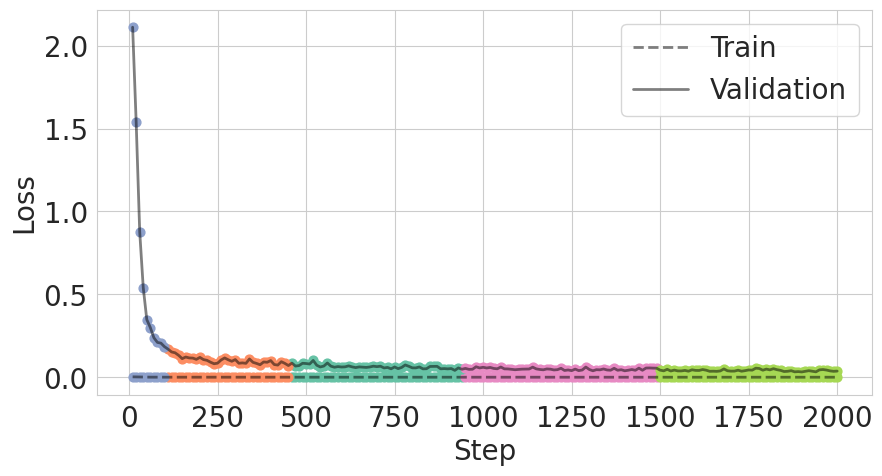

In [5]:
seed=0
df = pd.read_csv('./results/mnist_cnn/5_lr0.001_adamw_seed0_scaling1.0.csv')
plot_phases(df, 0.5, 40, n_states=5)

# CIFAR100 ResNet

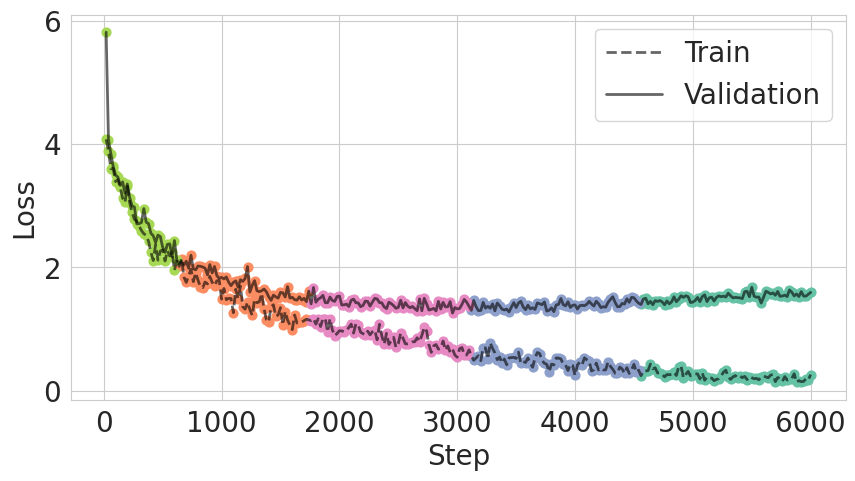

In [18]:
# normal
seed=0
df = pd.read_csv(f'./results/cifar100_v3/True_True/5_lr0.001_adamw_seed{seed}_scaling1.0.csv')
plot_phases(df, 0.6, 40, n_states=5)
plt.savefig(f'figures/cifar100_v3/True_True/{seed}', dpi=300, bbox_inches='tight')

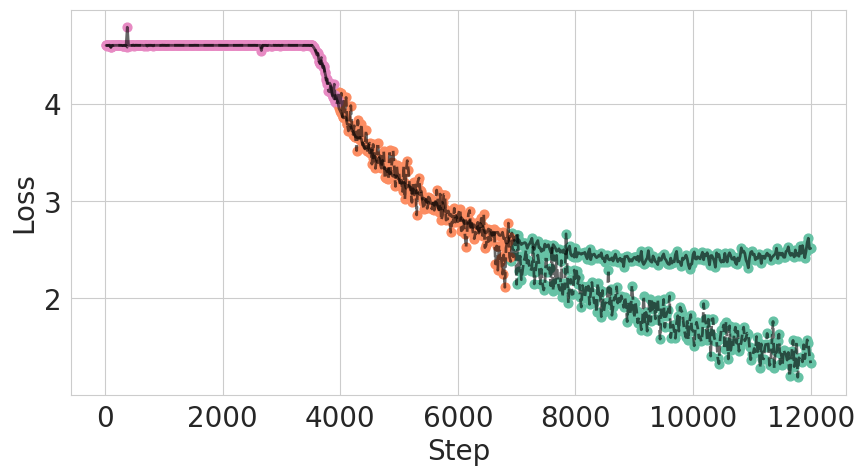

In [25]:
# no residual, no batch norm

seed=0
df = pd.read_csv('./results/cifar100_v3/False_False/5_lr0.001_adamw_seed0_scaling1.0.csv')
plot_phases(df, 0.6, 40, n_states=5)
plt.legend().remove()
plt.savefig(f'figures/cifar100_v3/False_False/{seed}', dpi=300, bbox_inches='tight')

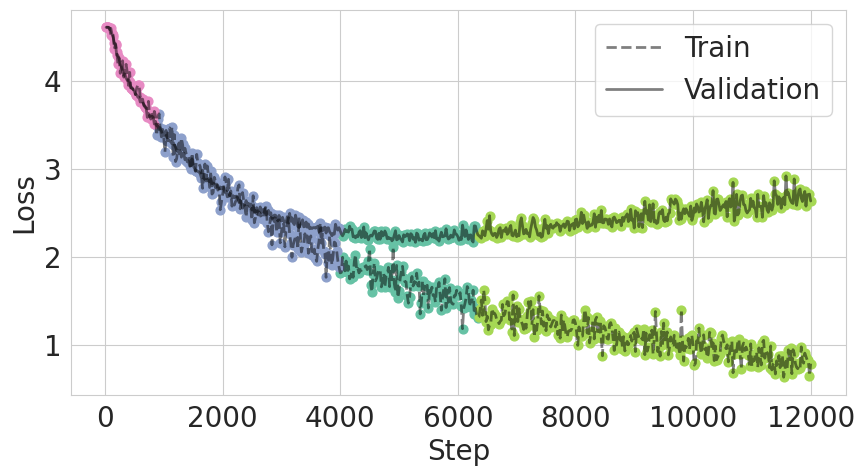

In [26]:
seed=2
df = pd.read_csv(f'./results/cifar100_v3/False_False/5_lr0.001_adamw_seed{seed}_scaling1.0.csv')
plot_phases(df, 0.5, 40, n_states=5)
# plt.legend().remove()
plt.savefig(f'figures/cifar100_v3/False_False/{seed}', dpi=300, bbox_inches='tight')

# multiberts

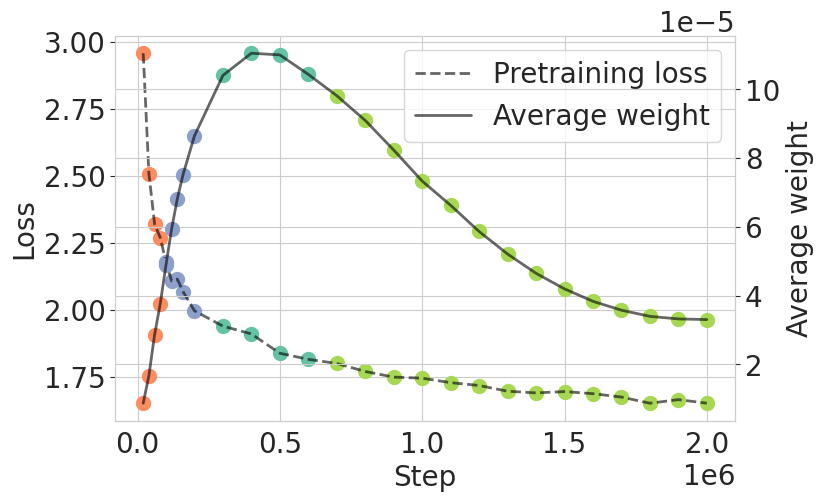

In [54]:
seed=1
df = pd.read_csv(f'./results/multiberts_diag/5_multiberts_{seed}.csv')
plot_phases_multiberts(df, 0.6, 100, n_states=5)
plt.savefig(f'figures/multiberts/{seed}', dpi=300, bbox_inches='tight')

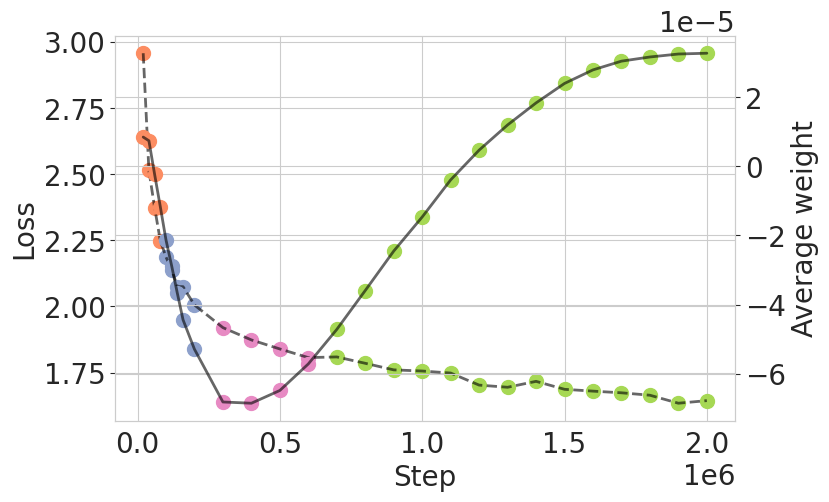

In [52]:
seed=0
df = pd.read_csv(f'./results/multiberts_diag/5_multiberts_{seed}.csv')
_, (ax1, _) = plot_phases_multiberts(df, 0.6, 100, n_states=5)
ax1.legend().remove()
plt.savefig(f'figures/multiberts/{seed}', dpi=300, bbox_inches='tight')

# modular addition

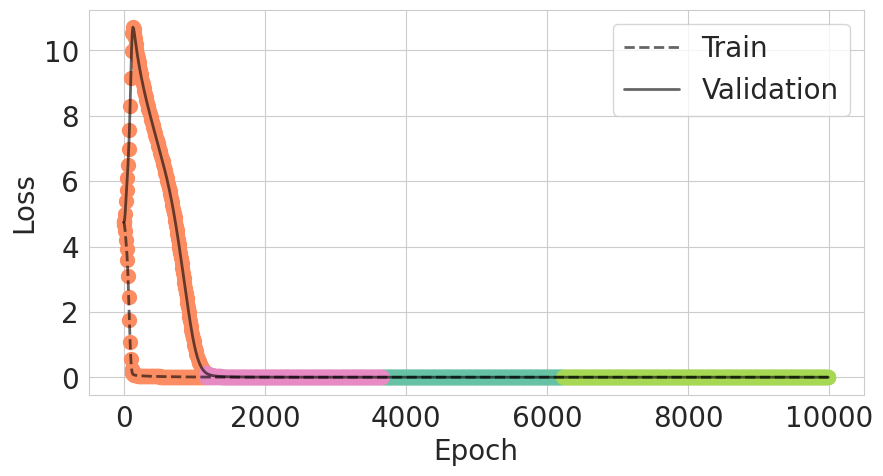

In [21]:
seed=35
df = pd.read_csv(f'./results/modular/6_lr0.001_adamw_seed{seed}_scaling1.0.csv')
plot_phases(df, 0.6, 100, n_states=6)
# plt.legend().remove()
plt.xlabel('Epoch')
plt.savefig(f'figures/modular/{seed}', dpi=300, bbox_inches='tight')

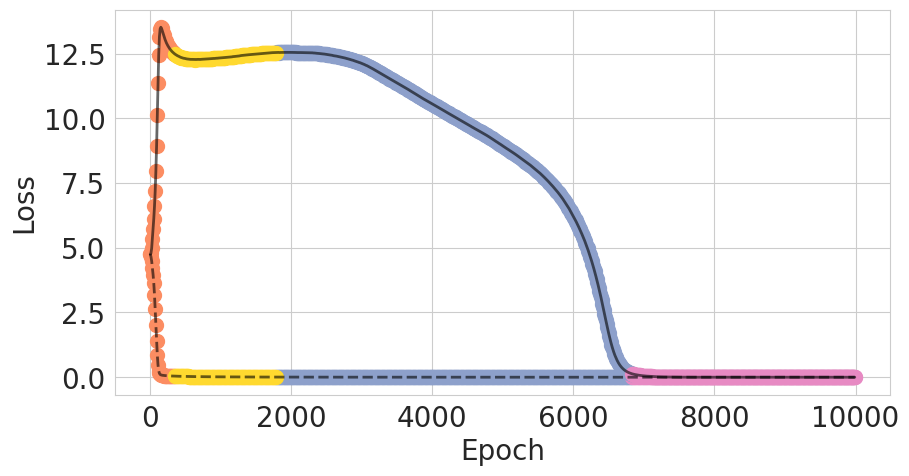

In [22]:
seed=19
df = pd.read_csv(f'./results/modular/6_lr0.001_adamw_seed{seed}_scaling1.0.csv')
plot_phases(df, 0.6, 100, n_states=6)
plt.legend().remove()
plt.xlabel('Epoch')
plt.savefig(f'figures/modular/{seed}', dpi=300, bbox_inches='tight')

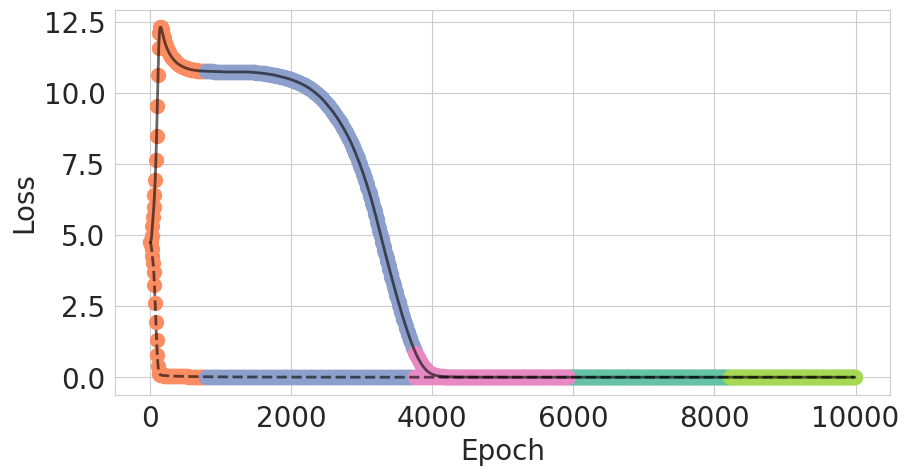

In [24]:
seed=2
df = pd.read_csv(f'./results/modular/6_lr0.001_adamw_seed{seed}_scaling1.0.csv')
plot_phases(df, 0.6, 100, n_states=6)
plt.xlabel('Epoch')
plt.legend().remove()
plt.savefig(f'figures/modular/{seed}', dpi=300, bbox_inches='tight')


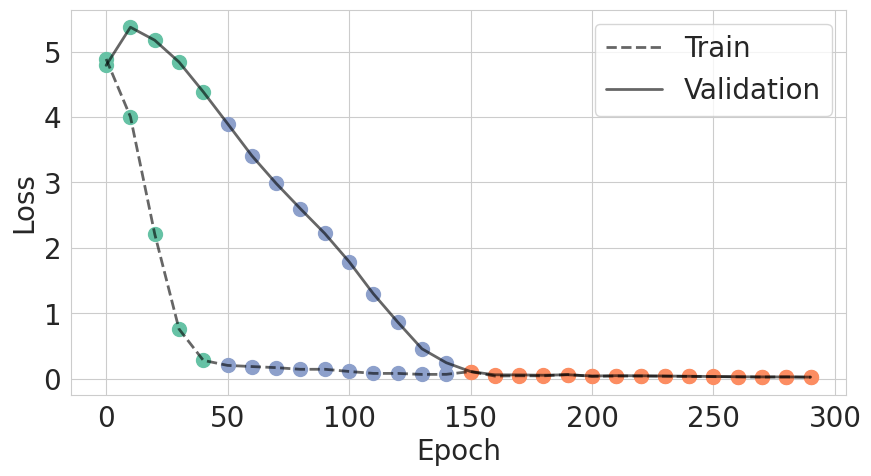

In [28]:
seed=0
df = pd.read_csv(f'./results/modular_ln/3_lr0.001_adamw_seed{seed}_scaling1.0.csv')
plot_phases(df, 0.6, 100, n_states=6)
plt.xlabel('Epoch')
plt.savefig(f'figures/modular_ln/{seed}', dpi=300, bbox_inches='tight')